### https://dsstudy.tistory.com/10
##### 참고한 블로그

### https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM  
##### (tensorflow의 lstm 공식문서) -> 옵션들 파악
#### lstm 적용하려면 3차원 array 형태로 변환해야함 
##### [data_size , time_steps, features] ([batch size, time steps, input_dims])

In [1]:
import pandas as pd
import seaborn as sns
import FinanceDataReader as fdr

In [2]:
df = pd.read_csv("[IT]삼성전자.csv")
df_columns = ['Date','Open', 'High', 'Low', 'Close', 'Volume']
df.columns = df_columns
df

,Date,Open,High,Low,Close,Volume
0,20220531,67500,67500,66700,67400,24365002
1,20220530,67500,67800,66900,67700,14255484
2,20220527,66700,66900,66200,66500,11405555
3,20220526,66300,67200,65500,65900,15970890
4,20220525,66700,67100,65900,66400,15150490
...,...,...,...,...,...,...
9876,19850109,126,126,122,123,324837
9877,19850108,129,129,127,127,845098
9878,19850107,129,130,128,129,771895
9879,19850105,129,129,128,128,108497


In [3]:
#시간순으로 정렬(시계열 데이터이므로 일단 시간순으로 정리)
df = df.sort_values('Date')
df

,Date,Open,High,Low,Close,Volume
9880,19850104,130,130,129,129,111765
9879,19850105,129,129,128,128,108497
9878,19850107,129,130,128,129,771895
9877,19850108,129,129,127,127,845098
9876,19850109,126,126,122,123,324837
...,...,...,...,...,...,...
4,20220525,66700,67100,65900,66400,15150490
3,20220526,66300,67200,65500,65900,15970890
2,20220527,66700,66900,66200,66500,11405555
1,20220530,67500,67800,66900,67700,14255484


In [4]:
##날짜 형식 지정해주기위해 str로 변경(원래는 int64로 되어있음)
df['Date']= df['Date'].astype('str')
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

df

,Open,High,Low,Close,Volume
Date,,,,,
1985-01-04,130,130,129,129,111765
1985-01-05,129,129,128,128,108497
1985-01-07,129,130,128,129,771895
1985-01-08,129,129,127,127,845098
1985-01-09,126,126,122,123,324837
...,...,...,...,...,...
2022-05-25,66700,67100,65900,66400,15150490
2022-05-26,66300,67200,65500,65900,15970890
2022-05-27,66700,66900,66200,66500,11405555


In [5]:
# 이동평균선 추가
ma = [5,20,60,120]
for days in ma:
    df['ma_'+str(days)] = df['Close'].rolling(window = days).mean()
    df['vma_'+str(days)] = df['Volume'].rolling(window = days).mean()

df.dropna(inplace=True)
df 

,Open,High,Low,Close,Volume,ma_5,vma_5,ma_20,vma_20,ma_60,vma_60,ma_120,vma_120
Date,,,,,,,,,,,,,
1985-05-29,120,120,120,120,190196,121.6,363529.2,121.95,409738.45,126.616667,5.606536e+05,125.583333,5.383551e+05
1985-05-30,120,120,120,120,152288,121.0,225620.8,121.85,403725.40,126.450000,5.558714e+05,125.508333,5.386928e+05
1985-05-31,120,120,120,120,379085,120.6,255686.2,121.80,411960.70,126.266667,5.338453e+05,125.441667,5.409477e+05
1985-06-01,120,121,120,120,507190,120.2,351764.8,121.70,397908.45,126.066667,5.196405e+05,125.366667,5.387418e+05
1985-06-03,120,120,120,120,483660,120.0,342483.8,121.60,380751.60,125.866667,5.180501e+05,125.308333,5.357298e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,66700,67100,65900,66400,15150490,67260.0,14700110.4,66680.00,15267016.10,68373.333333,1.465379e+07,72255.000000,1.457587e+07
2022-05-26,66300,67200,65500,65900,15970890,66940.0,14479543.0,66725.00,15159456.40,68270.000000,1.462361e+07,72210.000000,1.445592e+07
2022-05-27,66700,66900,66200,66500,11405555,66640.0,14338719.8,66810.00,14884957.80,68183.333333,1.460568e+07,72144.166667,1.436801e+07


In [6]:
import ta

H, L, C, V = df['High'], df['Low'], df['Close'], df['Volume']

# df['bol_high'] = ta.volatility.bollinger_hband(C)
# df['bol_low']  = ta.volatility.bollinger_lband(C)
df['MFI'] = ta.volume.money_flow_index(
    high=H, low=L, close=C, volume=V, fillna=True)

df['ADI'] = ta.volume.acc_dist_index(
    high=H, low=L, close=C, volume=V, fillna=True)

df['OBV'] = ta.volume.on_balance_volume(close=C, volume=V, fillna=True)
df['CMF'] = ta.volume.chaikin_money_flow(
    high=H, low=L, close=C, volume=V, fillna=True)

df['FI'] = ta.volume.force_index(close=C, volume=V, fillna=True)
df['EOM, EMV'] = ta.volume.ease_of_movement(
    high=H, low=L, volume=V, fillna=True)

df['VPT'] = ta.volume.volume_price_trend(close=C, volume=V, fillna=True)
df['NVI'] = ta.volume.negative_volume_index(close=C, volume=V, fillna=True)
df['VMAP'] = ta.volume.volume_weighted_average_price(
    high=H, low=L, close=C, volume=V, fillna=True)

# Volatility
df['ATR'] = ta.volatility.average_true_range(
    high=H, low=L, close=C, fillna=True)
df['BHB'] = ta.volatility.bollinger_hband(close=C, fillna=True)
df['BLB'] = ta.volatility.bollinger_lband(close=C, fillna=True)
df['KCH'] = ta.volatility.keltner_channel_hband(
    high=H, low=L, close=C, fillna=True)
df['KCL'] = ta.volatility.keltner_channel_lband(
    high=H, low=L, close=C, fillna=True)
df['KCM'] = ta.volatility.keltner_channel_mband(
    high=H, low=L, close=C, fillna=True)
df['DCH'] = ta.volatility.donchian_channel_hband(
    high=H, low=L, close=C, fillna=True)
df['DCL'] = ta.volatility.donchian_channel_lband(
    high=H, low=L, close=C, fillna=True)
df['DCM'] = ta.volatility.donchian_channel_mband(
    high=H, low=L, close=C, fillna=True)
df['UI'] = ta.volatility.ulcer_index(close=C, fillna=True)
# Trend
df['SMA'] = ta.trend.sma_indicator(close=C, fillna=True)
df['EMA'] = ta.trend.ema_indicator(close=C, fillna=True)
df['WMA'] = ta.trend.wma_indicator(close=C, fillna=True)
df['MACD'] = ta.trend.macd(close=C, fillna=True)
df['ADX'] = ta.trend.adx(high=H, low=L, close=C, fillna=True)
df['-VI'] = ta.trend.vortex_indicator_neg(
    high=H, low=L, close=C, fillna=True)
df['+VI'] = ta.trend.vortex_indicator_pos(
    high=H, low=L, close=C, fillna=True)
df['TRIX'] = ta.trend.trix(close=C, fillna=True)
df['MI'] = ta.trend.mass_index(high=H, low=L, fillna=True)
df['CCI'] = ta.trend.cci(high=H, low=L, close=C, fillna=True)
df['DPO'] = ta.trend.dpo(close=C, fillna=True)
df['KST'] = ta.trend.kst(close=C, fillna=True)
df['Ichimoku'] = ta.trend.ichimoku_a(high=H, low=L, fillna=True)
df['Parabolic SAR'] = ta.trend.psar_down(
    high=H, low=L, close=C, fillna=True)
df['STC'] = ta.trend.stc(close=C, fillna=True)
# Momentum
df['RSI'] = ta.momentum.rsi(close=C, fillna=True)
df['SRSI'] = ta.momentum.stochrsi(close=C, fillna=True)
df['TSI'] = ta.momentum.tsi(close=C, fillna=True)
df['UO'] = ta.momentum.ultimate_oscillator(
    high=H, low=L, close=C, fillna=True)
df['SR'] = ta.momentum.stoch(close=C, high=H, low=L, fillna=True)
df['WR'] = ta.momentum.williams_r(high=H, low=L, close=C, fillna=True)
df['AO'] = ta.momentum.awesome_oscillator(high=H, low=L, fillna=True)
df['KAMA'] = ta.momentum.kama(close=C, fillna=True)
df['ROC'] = ta.momentum.roc(close=C, fillna=True)
df['PPO'] = ta.momentum.ppo(close=C, fillna=True)
df['PVO'] = ta.momentum.pvo(volume=V, fillna=True)

df


C:\Users\ssoyeon\anaconda3_1\envs\dataanalysis\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\ssoyeon\anaconda3_1\envs\dataanalysis\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
C:\Users\ssoyeon\anaconda3_1\envs\dataanalysis\lib\site-packages\ta\trend.py:938: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_up = pd.Series(index=self._psar.index)
C:\Users\ssoyeon\anaconda3_1\envs\dataanalysis\lib\site-packages\ta\trend.py:939: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_down = pd.Series(index=self._psar.index)


,Open,High,Low,Close,Volume,ma_5,vma_5,ma_20,vma_20,ma_60,...,SRSI,TSI,UO,SR,WR,AO,KAMA,ROC,PPO,PVO
Date,,,,,,,,,,,,,,,,,,,,,
1985-05-29,120,120,120,120,190196,121.6,363529.2,121.95,409738.45,126.616667,...,0.000000,0.000000,50.000000,50.000000,-50.000000,0.000000,120.000000,0.000000,0.000000,0.000000
1985-05-30,120,120,120,120,152288,121.0,225620.8,121.85,403725.40,126.450000,...,0.000000,0.000000,50.000000,50.000000,-50.000000,0.000000,120.000000,0.000000,0.000000,-1.613764
1985-05-31,120,120,120,120,379085,120.6,255686.2,121.80,411960.70,126.266667,...,0.000000,0.000000,50.000000,50.000000,-50.000000,0.000000,120.000000,0.000000,0.000000,6.316504
1985-06-01,120,121,120,120,507190,120.2,351764.8,121.70,397908.45,126.066667,...,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,120.000000,0.000000,0.000000,15.677493
1985-06-03,120,120,120,120,483660,120.0,342483.8,121.60,380751.60,125.866667,...,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,120.000000,0.000000,0.000000,20.719643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,66700,67100,65900,66400,15150490,67260.0,14700110.4,66680.00,15267016.10,68373.333333,...,0.489124,-3.952454,43.443635,38.461538,-61.538462,388.823529,67011.957126,0.453858,-0.261875,0.386668
2022-05-26,66300,67200,65500,65900,15970890,66940.0,14479543.0,66725.00,15159456.40,68270.000000,...,0.357386,-5.479835,37.965632,25.641026,-74.358974,304.705882,66985.904289,0.304414,-0.369444,1.008718
2022-05-27,66700,66900,66200,66500,11405555,66640.0,14338719.8,66810.00,14884957.80,68183.333333,...,0.557810,-5.612231,39.659519,41.025641,-58.974359,47.352941,66983.881794,1.217656,-0.378074,-0.991578


In [7]:
# mask = df.index >= '2000-01-01'
# df = df.loc[mask]
# df

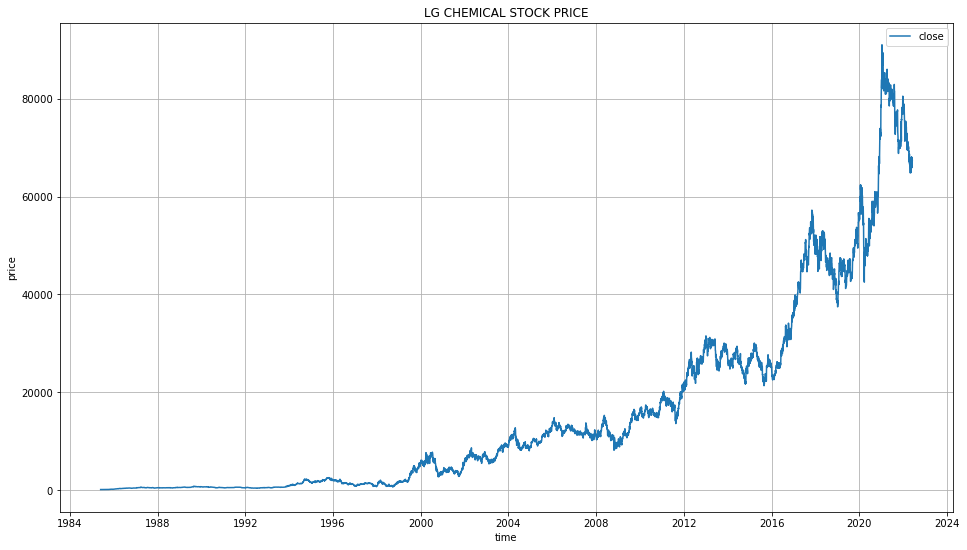

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 9))

plt.title("LG CHEMICAL STOCK PRICE")
sns.lineplot(y=df['Close'], x=df.index, label = "close")
plt.xlabel('time')
plt.ylabel('price')
plt.grid()
plt.show()


In [9]:
df.isnull().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
ma_5             0
vma_5            0
ma_20            0
vma_20           0
ma_60            0
vma_60           0
ma_120           0
vma_120          0
MFI              0
ADI              0
OBV              0
CMF              0
FI               0
EOM, EMV         0
VPT              0
NVI              0
VMAP             0
ATR              0
BHB              0
BLB              0
KCH              0
KCL              0
KCM              0
DCH              0
DCL              0
DCM              0
UI               0
SMA              0
EMA              0
WMA              0
MACD             0
ADX              0
-VI              0
+VI              0
TRIX             0
MI               0
CCI              0
DPO              0
KST              0
Ichimoku         0
Parabolic SAR    0
STC              0
RSI              0
SRSI             0
TSI              0
UO               0
SR               0
WR          

In [10]:
from sklearn.preprocessing import MinMaxScaler

# 피처값 스케일링
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df.drop(['Close'], axis=1))
scaled_df = pd.DataFrame(scaled_df, columns = df.drop(['Close'], axis=1).columns)

scaler1 = MinMaxScaler()

temp = scaler1.fit_transform(df['Close'].values.reshape(-1,1))

scaled_df.insert(3, 'Close',temp)
scaled_df


,Open,High,Low,Close,Volume,ma_5,vma_5,ma_20,vma_20,ma_60,...,SRSI,TSI,UO,SR,WR,AO,KAMA,ROC,PPO,PVO
0,0.000044,0.000041,0.000056,0.000044,0.000582,0.000062,0.002166,0.000058,0.002396,0.000083,...,0.000000,0.583970,0.555043,0.500000,0.500000,0.430632,0.000029,0.324027,0.480327,0.383461
1,0.000044,0.000041,0.000056,0.000044,0.000466,0.000056,0.001117,0.000057,0.002334,0.000081,...,0.000000,0.583970,0.555043,0.500000,0.500000,0.430632,0.000029,0.324027,0.480327,0.371848
2,0.000044,0.000041,0.000056,0.000044,0.001161,0.000051,0.001346,0.000057,0.002419,0.000078,...,0.000000,0.583970,0.555043,0.500000,0.500000,0.430632,0.000029,0.324027,0.480327,0.428919
3,0.000044,0.000052,0.000056,0.000044,0.001553,0.000047,0.002077,0.000055,0.002274,0.000076,...,0.000000,0.583970,0.000000,0.000000,0.000000,0.430632,0.000029,0.324027,0.480327,0.496286
4,0.000044,0.000041,0.000056,0.000044,0.001481,0.000045,0.002006,0.000054,0.002097,0.000074,...,0.000000,0.583970,0.000000,0.000000,0.000000,0.430632,0.000029,0.324027,0.480327,0.532572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9757,0.738313,0.692814,0.735974,0.729325,0.046385,0.747340,0.111198,0.768688,0.155456,0.813654,...,0.489124,0.560889,0.482262,0.384615,0.384615,0.447004,0.762763,0.327972,0.471783,0.386244
9758,0.733877,0.693848,0.731499,0.723824,0.048897,0.743778,0.109521,0.769208,0.154348,0.812422,...,0.357386,0.551970,0.421451,0.256410,0.256410,0.443462,0.762466,0.326673,0.468274,0.390721
9759,0.738313,0.690745,0.739330,0.730426,0.034920,0.740439,0.108450,0.770190,0.151520,0.811389,...,0.557810,0.551196,0.440255,0.410256,0.410256,0.432626,0.762443,0.334610,0.467992,0.376325
9760,0.747184,0.700054,0.747161,0.743629,0.043645,0.739994,0.109319,0.770363,0.145372,0.810356,...,0.907647,0.563245,0.477474,0.717949,0.717949,0.425964,0.762733,0.361524,0.472585,0.376267


In [11]:
scaled_df

,Open,High,Low,Close,Volume,ma_5,vma_5,ma_20,vma_20,ma_60,...,SRSI,TSI,UO,SR,WR,AO,KAMA,ROC,PPO,PVO
0,0.000044,0.000041,0.000056,0.000044,0.000582,0.000062,0.002166,0.000058,0.002396,0.000083,...,0.000000,0.583970,0.555043,0.500000,0.500000,0.430632,0.000029,0.324027,0.480327,0.383461
1,0.000044,0.000041,0.000056,0.000044,0.000466,0.000056,0.001117,0.000057,0.002334,0.000081,...,0.000000,0.583970,0.555043,0.500000,0.500000,0.430632,0.000029,0.324027,0.480327,0.371848
2,0.000044,0.000041,0.000056,0.000044,0.001161,0.000051,0.001346,0.000057,0.002419,0.000078,...,0.000000,0.583970,0.555043,0.500000,0.500000,0.430632,0.000029,0.324027,0.480327,0.428919
3,0.000044,0.000052,0.000056,0.000044,0.001553,0.000047,0.002077,0.000055,0.002274,0.000076,...,0.000000,0.583970,0.000000,0.000000,0.000000,0.430632,0.000029,0.324027,0.480327,0.496286
4,0.000044,0.000041,0.000056,0.000044,0.001481,0.000045,0.002006,0.000054,0.002097,0.000074,...,0.000000,0.583970,0.000000,0.000000,0.000000,0.430632,0.000029,0.324027,0.480327,0.532572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9757,0.738313,0.692814,0.735974,0.729325,0.046385,0.747340,0.111198,0.768688,0.155456,0.813654,...,0.489124,0.560889,0.482262,0.384615,0.384615,0.447004,0.762763,0.327972,0.471783,0.386244
9758,0.733877,0.693848,0.731499,0.723824,0.048897,0.743778,0.109521,0.769208,0.154348,0.812422,...,0.357386,0.551970,0.421451,0.256410,0.256410,0.443462,0.762466,0.326673,0.468274,0.390721
9759,0.738313,0.690745,0.739330,0.730426,0.034920,0.740439,0.108450,0.770190,0.151520,0.811389,...,0.557810,0.551196,0.440255,0.410256,0.410256,0.432626,0.762443,0.334610,0.467992,0.376325
9760,0.747184,0.700054,0.747161,0.743629,0.043645,0.739994,0.109319,0.770363,0.145372,0.810356,...,0.907647,0.563245,0.477474,0.717949,0.717949,0.425964,0.762733,0.361524,0.472585,0.376267


In [12]:
df = scaled_df


In [13]:
window_size = 20
TEST_SIZE = int(len(df) * 0.7)

In [14]:
train = df[:TEST_SIZE]
test = df[TEST_SIZE:]

##200일의 데이터를 얼마나 잘 예측하느냐

In [15]:
train

,Open,High,Low,Close,Volume,ma_5,vma_5,ma_20,vma_20,ma_60,...,SRSI,TSI,UO,SR,WR,AO,KAMA,ROC,PPO,PVO
0,0.000044,0.000041,0.000056,0.000044,0.000582,0.000062,0.002166,0.000058,0.002396,0.000083,...,0.000000,0.583970,0.555043,0.500000,0.500000,0.430632,0.000029,0.324027,0.480327,0.383461
1,0.000044,0.000041,0.000056,0.000044,0.000466,0.000056,0.001117,0.000057,0.002334,0.000081,...,0.000000,0.583970,0.555043,0.500000,0.500000,0.430632,0.000029,0.324027,0.480327,0.371848
2,0.000044,0.000041,0.000056,0.000044,0.001161,0.000051,0.001346,0.000057,0.002419,0.000078,...,0.000000,0.583970,0.555043,0.500000,0.500000,0.430632,0.000029,0.324027,0.480327,0.428919
3,0.000044,0.000052,0.000056,0.000044,0.001553,0.000047,0.002077,0.000055,0.002274,0.000076,...,0.000000,0.583970,0.000000,0.000000,0.000000,0.430632,0.000029,0.324027,0.480327,0.496286
4,0.000044,0.000041,0.000056,0.000044,0.001481,0.000045,0.002006,0.000054,0.002097,0.000074,...,0.000000,0.583970,0.000000,0.000000,0.000000,0.430632,0.000029,0.324027,0.480327,0.532572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6828,0.171472,0.163460,0.171673,0.173892,0.057035,0.171542,0.117380,0.182452,0.154444,0.189377,...,0.779565,0.540870,0.606849,0.569444,0.569444,0.419747,0.177027,0.314311,0.458686,0.386355
6829,0.175907,0.164702,0.175924,0.175212,0.038587,0.173100,0.121293,0.182394,0.154704,0.189207,...,0.903044,0.555597,0.685325,0.691176,0.691176,0.423987,0.177082,0.304949,0.466446,0.373328
6830,0.175685,0.165943,0.176372,0.173892,0.047025,0.174035,0.117399,0.182371,0.157702,0.188972,...,0.755466,0.563720,0.656142,0.602941,0.602941,0.428688,0.177110,0.314311,0.470690,0.373177
6831,0.179012,0.170080,0.180623,0.180054,0.101660,0.176484,0.143251,0.182429,0.165108,0.188877,...,1.000000,0.588917,0.698770,0.945205,0.945205,0.435115,0.178617,0.354599,0.483332,0.433949


In [16]:
test

,Open,High,Low,Close,Volume,ma_5,vma_5,ma_20,vma_20,ma_60,...,SRSI,TSI,UO,SR,WR,AO,KAMA,ROC,PPO,PVO
6833,0.179677,0.168425,0.178162,0.175212,0.051866,0.178754,0.142657,0.182233,0.171162,0.188746,...,0.595336,0.607304,0.622105,0.643836,0.643836,0.444658,0.180110,0.355468,0.492470,0.416687
6834,0.173024,0.164081,0.174582,0.173672,0.044716,0.178443,0.145702,0.181829,0.171350,0.188519,...,0.481027,0.603729,0.644452,0.547945,0.547945,0.443455,0.180103,0.356931,0.490544,0.403697
6835,0.175020,0.164702,0.174582,0.174332,0.035473,0.178532,0.139963,0.181621,0.169684,0.188348,...,0.530270,0.602754,0.624557,0.589041,0.589041,0.441731,0.180124,0.359154,0.489897,0.382695
6836,0.179899,0.168011,0.179057,0.178513,0.050778,0.178220,0.114685,0.181759,0.169212,0.188297,...,0.812914,0.613635,0.659412,0.849315,0.849315,0.439482,0.180589,0.380684,0.495470,0.383336
6837,0.178790,0.167804,0.177938,0.176533,0.047382,0.177686,0.113773,0.181621,0.169891,0.188193,...,0.649320,0.616182,0.675836,0.726027,0.726027,0.436795,0.180711,0.361035,0.496723,0.379952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9757,0.738313,0.692814,0.735974,0.729325,0.046385,0.747340,0.111198,0.768688,0.155456,0.813654,...,0.489124,0.560889,0.482262,0.384615,0.384615,0.447004,0.762763,0.327972,0.471783,0.386244
9758,0.733877,0.693848,0.731499,0.723824,0.048897,0.743778,0.109521,0.769208,0.154348,0.812422,...,0.357386,0.551970,0.421451,0.256410,0.256410,0.443462,0.762466,0.326673,0.468274,0.390721
9759,0.738313,0.690745,0.739330,0.730426,0.034920,0.740439,0.108450,0.770190,0.151520,0.811389,...,0.557810,0.551196,0.440255,0.410256,0.410256,0.432626,0.762443,0.334610,0.467992,0.376325
9760,0.747184,0.700054,0.747161,0.743629,0.043645,0.739994,0.109319,0.770363,0.145372,0.810356,...,0.907647,0.563245,0.477474,0.717949,0.717949,0.425964,0.762733,0.361524,0.472585,0.376267


In [17]:
#데이터셋을 만들어 주는 함수

import numpy as np

def make_dataset(feature, label, window_size = 20):
  
  feature_list = []
  label_list = []
  
  for i in range(len(feature) - window_size) :
    feature_list.append(feature.iloc[i:i+window_size])
    label_list.append(label.iloc[i+window_size])
  
  return np.array(feature_list), np.array(label_list)


In [18]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'ma_5', 'vma_5', 'ma_20',
       'vma_20', 'ma_60', 'vma_60', 'ma_120', 'vma_120', 'MFI', 'ADI', 'OBV',
       'CMF', 'FI', 'EOM, EMV', 'VPT', 'NVI', 'VMAP', 'ATR', 'BHB', 'BLB',
       'KCH', 'KCL', 'KCM', 'DCH', 'DCL', 'DCM', 'UI', 'SMA', 'EMA', 'WMA',
       'MACD', 'ADX', '-VI', '+VI', 'TRIX', 'MI', 'CCI', 'DPO', 'KST',
       'Ichimoku', 'Parabolic SAR', 'STC', 'RSI', 'SRSI', 'TSI', 'UO', 'SR',
       'WR', 'AO', 'KAMA', 'ROC', 'PPO', 'PVO'],
      dtype='object')

In [19]:
# feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
feature_cols = df.drop('Close', axis =1).columns
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label,20)

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2, shuffle = False)
x_train.shape, x_valid.shape

((5450, 20, 5), (1363, 20, 5))

In [20]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature , test_label = make_dataset(test_feature, test_label,20)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import LSTM,Dropout

model = Sequential()

model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu')
          )
model.add(Dense(1))
model.add(Dropout(0.2))

#LSTM의 첫번재 옵션 unit은 output의 차원
#time_steps(window_size)이 train_features.shape[1], features이 train_features.shape[2] 
#예측하고자하는 target의 갯수가 1이므로 마지막에 Dense(1)을 하나 추가

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1408      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________


In [23]:
train_feature.shape[1], train_feature.shape[2]

(20, 5)

In [24]:
model.compile(loss='mean_squared_error', optimizer='adam')
#실제 연속적인 값을 예측하는 것이기 때문에 loss function은 mse
#일반적으로 optimizer은 adam 주로 사용
early_stop = EarlyStopping(monitor='val_loss', patience=10)
#10회 Epoch동안 개선되지 않는다면 종료

import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=100, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])


Epoch 1/100
340/341 [============================>.] - ETA: 0s - loss: 2.8631e-04
Epoch 1: val_loss improved from inf to 0.00077, saving model to model\tmp_checkpoint.h5
341/341 [==============================] - 6s 12ms/step - loss: 2.8739e-04 - val_loss: 7.7322e-04
Epoch 2/100
339/341 [============================>.] - ETA: 0s - loss: 3.1138e-04
Epoch 2: val_loss did not improve from 0.00077
341/341 [==============================] - 3s 10ms/step - loss: 3.1483e-04 - val_loss: 9.4140e-04
Epoch 3/100
340/341 [============================>.] - ETA: 0s - loss: 2.7784e-04
Epoch 3: val_loss did not improve from 0.00077
341/341 [==============================] - 3s 10ms/step - loss: 2.7734e-04 - val_loss: 9.1889e-04
Epoch 4/100
337/341 [============================>.] - ETA: 0s - loss: 2.4735e-04
Epoch 4: val_loss did not improve from 0.00077
341/341 [==============================] - 3s 10ms/step - loss: 2.5049e-04 - val_loss: 0.0010
Epoch 5/100
341/341 [==============================] - 

91/91 [==============================] - 1s 4ms/step


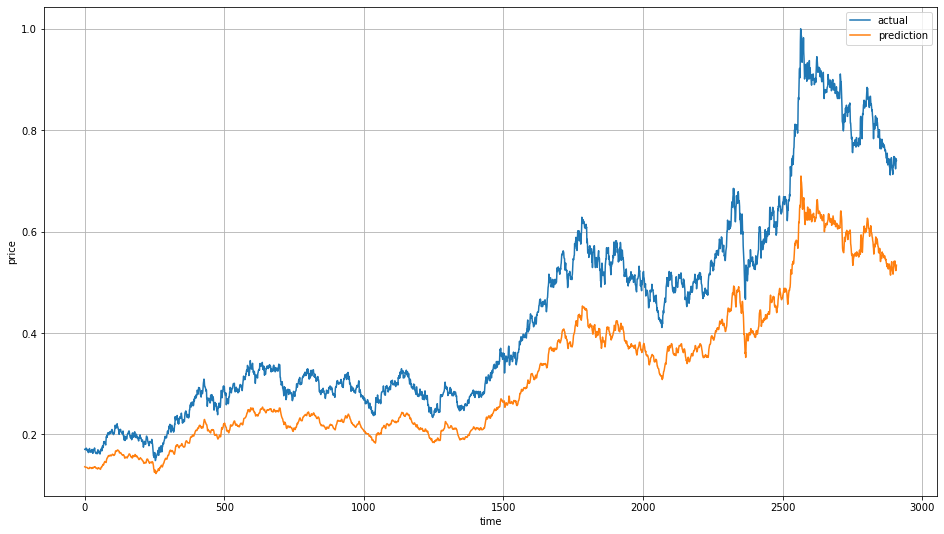

In [25]:
model.load_weights(filename)

pred = model.predict(test_feature)

plt.figure(figsize = (16,9))
plt.xlabel("time")
plt.ylabel("price")
plt.plot(test_label, label="actual")
plt.plot(pred, label="prediction")
plt.grid()
plt.legend(loc="best")
plt.show()

In [26]:
rescaled_y_true = scaler1.inverse_transform(np.array(test_label).reshape(-1, 1))
rescaled_pred = scaler1.inverse_transform(np.array(pred).reshape(-1,1))

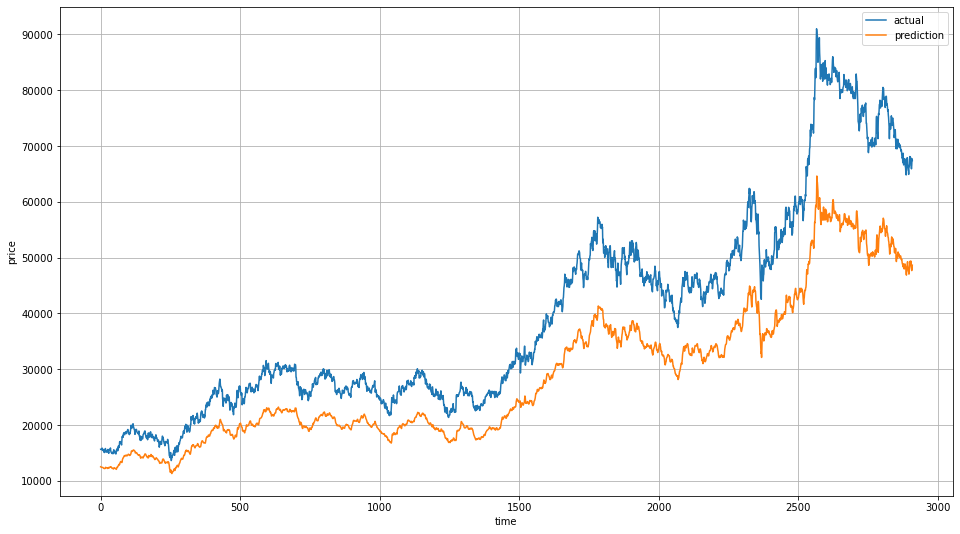

In [27]:

plt.figure(figsize = (16,9))
plt.xlabel("time")
plt.ylabel("price")
plt.plot(rescaled_y_true, label="actual")
plt.plot(rescaled_pred, label="prediction")
plt.grid()
plt.legend(loc="best")
plt.show()

In [28]:
# 평가지표 함수
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def confirm_result(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MSLE = mean_squared_log_error(y_test, y_pred)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
        
    pd.options.display.float_format = '{:.5f}'.format
    Result = pd.DataFrame(data=[MAE,RMSE, RMSLE, R2],
                            index = ['MAE','RMSE', 'RMSLE', 'R2'],
                            columns=['Results'])
    return Result

In [29]:
confirm_result(rescaled_y_true, rescaled_pred)

,Results
MAE,10359.67702
RMSE,11930.19470
RMSLE,0.29468
R2,0.59140
